# (EDA) and Visualization of S&P 500 Companies & Stocks

# About S&P500
The S&P 500 Index, commonly referred to as the Standard & Poor’s 500 Index, is a market-capitalization-weighted index comprising 500 of the most prominent publicly traded companies in the United States. This index is widely regarded as a benchmark for the overall performance of the U.S. stock market. The S&P 500 covers a diverse range of industries, including technology, healthcare, financial services, consumer goods, and energy, offering a comprehensive snapshot of the market's health and trends.

## Objective
The objective of this notebook is to perform an exploratory data analysis (EDA) on the S&P 500 companies dataset. We aim to clean the data, handle missing values, identify outliers, and visualize various aspects of the data to gain insights into the financial and operational metrics of these companies.


# 1.Introduction
In this notebook, we will analyze the S&P 500 companies dataset to understand the financial and operational metrics of these companies. The S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.

# 2. Data Loading
We will start by loading the necessary libraries and the dataset.

In [113]:
# Importing necessary libraries for EDA
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [114]:
df=pd.read_csv('sp500_stocks.csv')

# 3. Descriptive-Statistics

In [115]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,617831.000000,617831.000000,617831.000000,617831.000000,617831.000000,6.178310e+05
mean,79.672357,87.471540,88.417844,86.480997,87.460302,9.347125e+06
std,102.742931,104.521901,105.684113,103.300770,104.519845,4.771669e+07
min,0.203593,0.222000,0.226250,0.216250,0.218000,0.000000e+00
25%,26.572459,32.700001,33.060001,32.299999,32.689999,1.144000e+06
50%,49.821613,59.139999,59.720001,58.500000,59.119999,2.453400e+06
75%,94.831036,105.019997,106.129997,103.889999,105.000000,5.657850e+06
max,1702.530029,1702.530029,1714.750000,1696.900024,1706.400024,3.692928e+09


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891536 entries, 0 to 1891535
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 115.5+ MB


In [117]:
# Checking for missing values in each dataframe
df.isnull().sum()

Date               0
Symbol             0
Adj Close    1273705
Close        1273705
High         1273705
Low          1273705
Open         1273705
Volume       1273705
dtype: int64

In [118]:
df.columns.tolist()

['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# 4. Data Cleaning

In [119]:
# Replacing 'null' strings with NaN and converting relevant columns to numeric types
df.replace('null', pd.NA, inplace=True)

This line replaces the string 'null' with NaN (Not a Number) in the sp500_stocks dataframe. This is to ensure that the missing values are properly recognized as NaN, rather than as a string.

In [120]:
# Converting relevant columns to numeric types
numeric_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

This section identifies the columns that should be numeric and converts them to numeric data types using the pd.to_numeric() function. The errors='coerce' parameter is used to convert any non-numeric values to NaN.

# 5. Handling Missing values

In [121]:
# Fill missing values with the mean for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [122]:
# Displaying the head of the cleaned dataframe
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,79.672357,87.47154,88.417844,86.480997,87.460302,9.347125e+06
1,2010-01-05,MMM,79.672357,87.47154,88.417844,86.480997,87.460302,9.347125e+06
2,2010-01-06,MMM,79.672357,87.47154,88.417844,86.480997,87.460302,9.347125e+06
3,2010-01-07,MMM,79.672357,87.47154,88.417844,86.480997,87.460302,9.347125e+06
4,2010-01-08,MMM,79.672357,87.47154,88.417844,86.480997,87.460302,9.347125e+06


This line displays the first 5 rows (head) of the cleaned sp500_stocks dataframe, which is stored in the cleaned_stocks_head variable.


# 5. Outliers Detection

In [123]:
# Identifying outliers using the IQR method for numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

This section calculates the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR) for the numeric columns in the sp500_stocks dataframe.
It then calculates the lower and upper bounds for identifying outliers using the IQR method. The lower bound is set to Q1 - 1.5 * IQR, and the upper bound is set to Q3 + 1.5 * IQR.

In [124]:
# Creating a boolean mask for outliers
outliers_mask = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound))

This line creates a boolean mask that identifies the outliers in the numeric columns of the sp500_stocks dataframe. The mask is True for values that are outside the lower and upper bounds, and False for values within the bounds.

In [125]:
# Counting the number of outliers in each column
outliers_count = outliers_mask.sum()

This line counts the number of outliers in each numeric column of the sp500_stocks dataframe by summing the True values in the outliers_mask.

In [126]:
# Displaying the count of outliers for each numeric column
outliers_count

Adj Close    617831
Close        617831
High         617831
Low          617831
Open         617831
Volume       189955
dtype: int64

# 6. Data Visualization

In [127]:
# Setting the style for the plots
sns.set(style='whitegrid')

# Converting 'Date' column to datetime format for better plotting
df['Date'] = pd.to_datetime(df['Date'])

## 6.1. Tading Volume over time

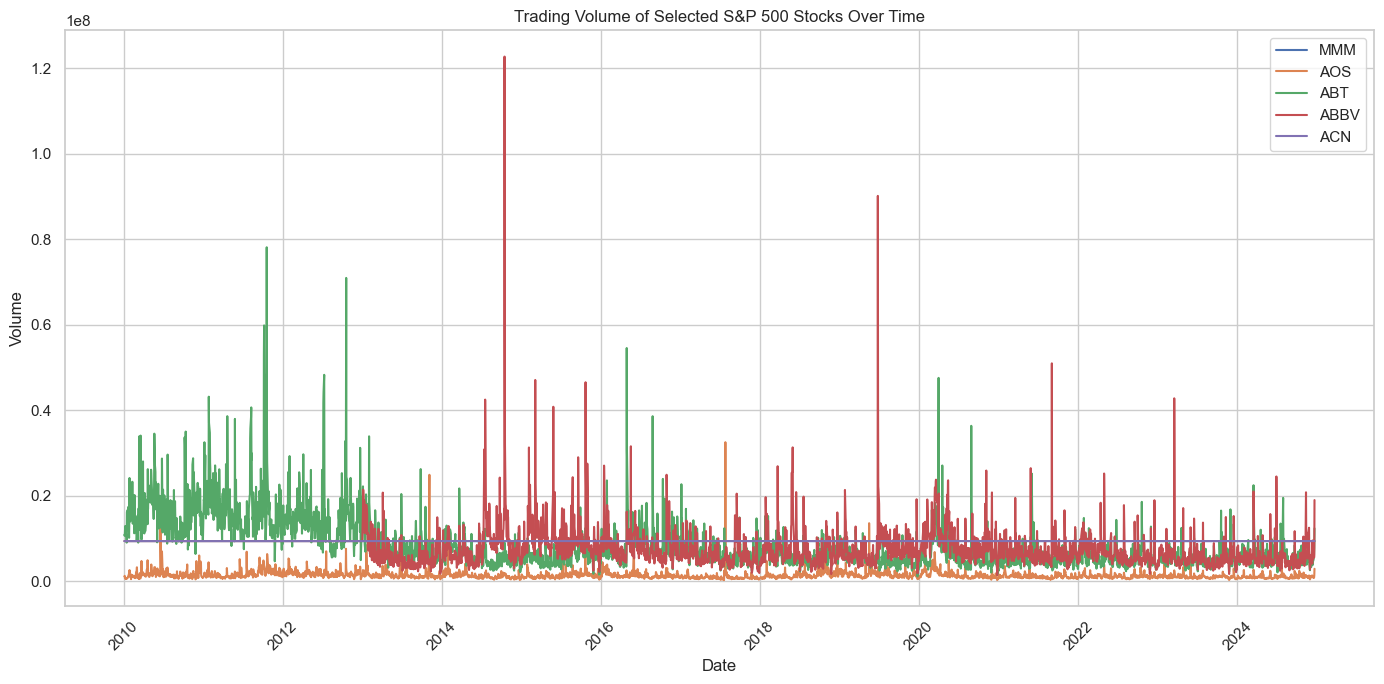

In [128]:
# Plotting the trading volume over time for a specific stock (e.g., 'ACN')
plt.figure(figsize=(14, 7))
for symbol in df['Symbol'].unique()[:5]:  # Plotting first 5 stocks for clarity
    stock_data = df[df['Symbol'] == symbol]
    plt.plot(stock_data['Date'], stock_data['Volume'], label=symbol)
plt.title('Trading Volume of Selected S&P 500 Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretaion:
The graph displays the trading volume of five selected S&P 500 stocks over time.
MMM: The trading volume of 3M (MMM) is consistently low, hovering around 10 million shares.
AOS: The trading volume of A. O. Smith (AOS) is generally low, but experiences occasional spikes, particularly in 2012.
ABT: The trading volume of Abbott Laboratories (ABT) is significantly higher than MMM and AOS, with numerous peaks and dips.
ABBV: The trading volume of AbbVie (ABBV) exhibits the highest volume among the five stocks. It demonstrates substantial fluctuations and several pronounced spikes, particularly around 2014 and 2020.
ACN: The trading volume of Accenture (ACN) is relatively consistent, with a steady volume around 10 million shares.

## 6.2. Adujested close price and moving average

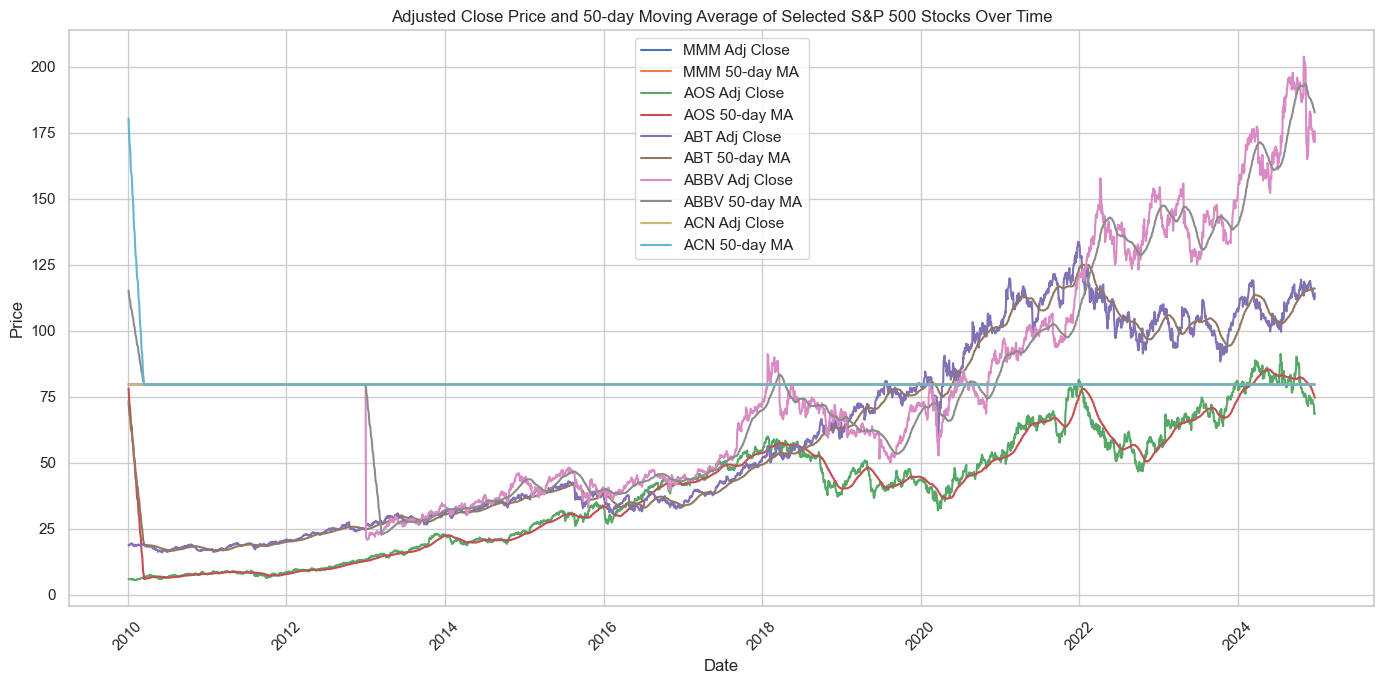

In [129]:
# Calculate the moving average for the 'Adj Close' column
df['Moving_Average'] = df['Adj Close'].rolling(window=50).mean()

# Plotting the adjusted close price and moving average over time for a specific stock (e.g., 'AAPL')
plt.figure(figsize=(14, 7))
for symbol in df['Symbol'].unique()[:5]:  # Plotting first 5 stocks for clarity
    stock_data = df[df['Symbol'] == symbol]
    plt.plot(stock_data['Date'], stock_data['Adj Close'], label=f'{symbol} Adj Close')
    plt.plot(stock_data['Date'], stock_data['Moving_Average'], label=f'{symbol} 50-day MA')
plt.title('Adjusted Close Price and 50-day Moving Average of Selected S&P 500 Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation:
The chart depicts the adjusted closing price and 50-day moving average of six selected S&P 500 stocks over time.
MMM: The stock price experienced a significant decline in 2010, but has since recovered and has been relatively stable in recent years.
AOS: The stock price has been steadily increasing since 2010, with some fluctuations along the way.
ABT: The stock price has been relatively stable in recent years, but has seen a slight increase in 2023.
ABBV: The stock price has seen significant growth since 2010, and has been on an upward trend for the past several years.
ACN: The stock price has been steadily increasing since 2010, and has experienced significant growth in recent years.
Overall Trend: The chart shows that the stock prices of these six companies have generally been increasing over the period shown.
Note: The 50-day moving average is a technical indicator used by traders to identify trends in stock prices. The 50-day moving average line helps smooth out short-term fluctuations and provides a better view of the overall trend of a stock.

In [130]:
df = pd.read_csv('sp500_companies.csv')

In [131]:
df.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.730000e+02,499.000000,4.930000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.070541,5.782761e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.180247,1.395988e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.051000,2.169000e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.109000,5.510000e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.632000,2.100000e+06,0.069209


## 6.3. Distribution of Revenue Growth

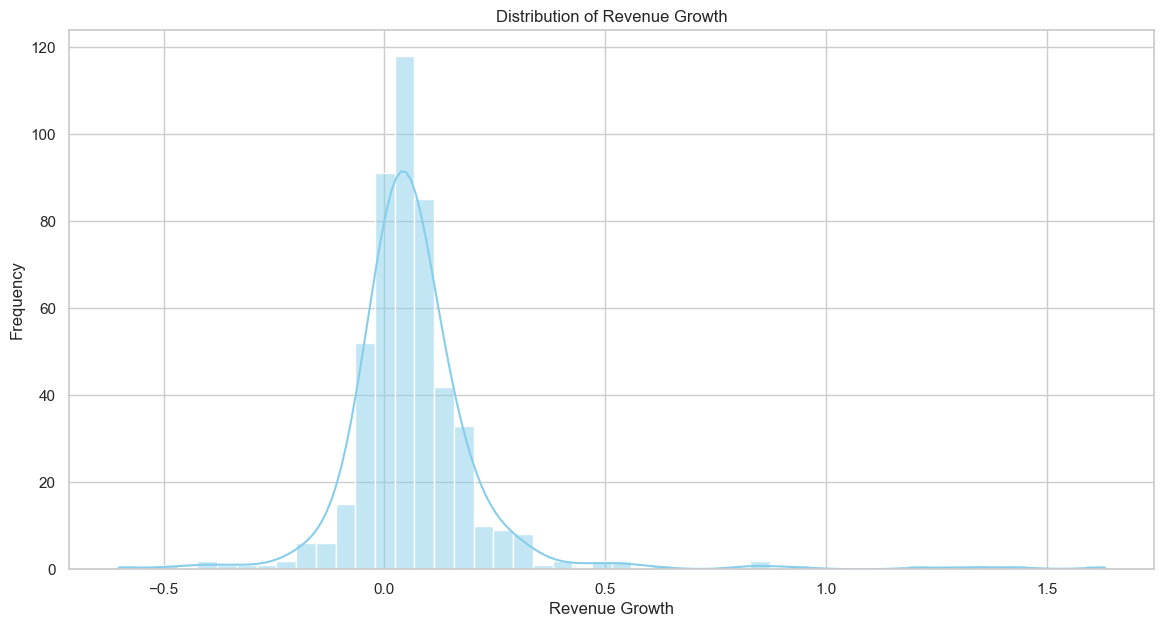

In [132]:

# Plotting the distribution of Revenue Growth
df['Revenuegrowth'] = df['Revenuegrowth'].replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(14, 7))
sns.histplot(df['Revenuegrowth'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Revenue Growth')
plt.xlabel('Revenue Growth')
plt.ylabel('Frequency')
plt.show()

Interpretation:
The histogram shows the distribution of revenue growth.
The data is skewed to the right, indicating that most companies have experienced a small increase in revenue, with fewer companies having very high growth.
The distribution appears to be approximately normal with a peak around 0, suggesting that the majority of companies have experienced a small increase or decrease in revenue.

## 6.4. Average Market Capitalization by Sector

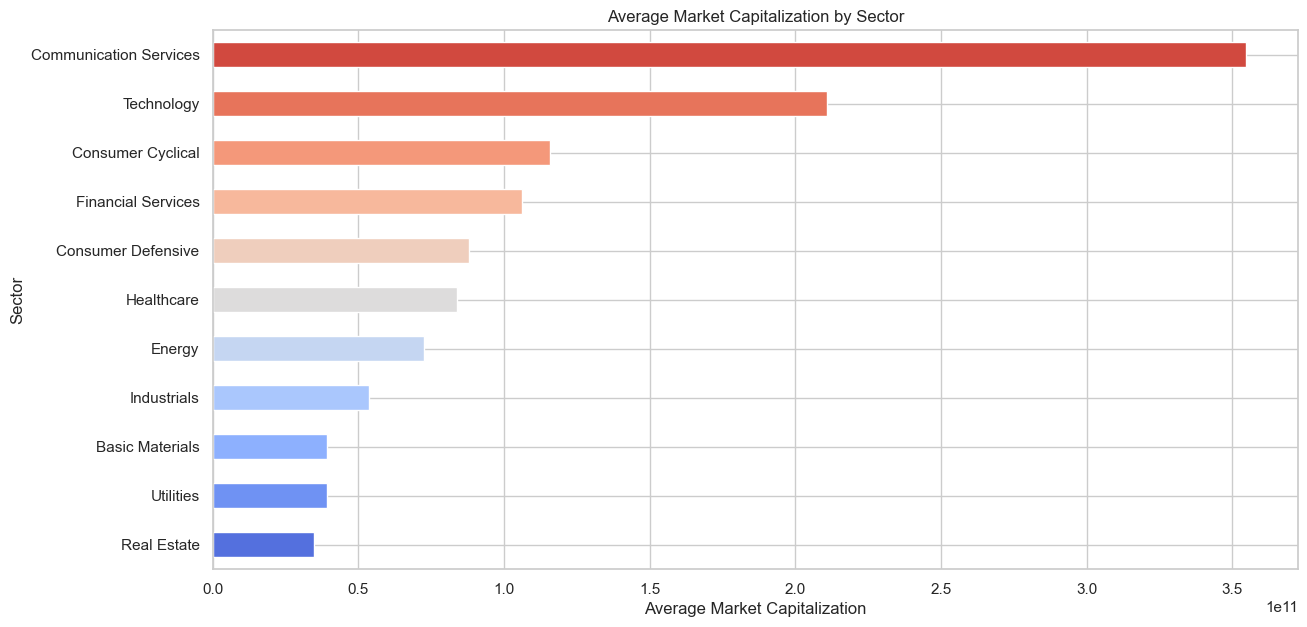

In [135]:
# Calculate average market capitalization by sector
sector_marketcap = df.groupby('Sector')['Marketcap'].mean().sort_values()

# Choose a color palette
colors = sns.color_palette("coolwarm", len(sector_marketcap))

# Plotting
plt.figure(figsize=(14, 7))
sector_marketcap.plot(kind='barh', color=colors)
plt.title('Average Market Capitalization by Sector')
plt.xlabel('Average Market Capitalization')
plt.ylabel('Sector')
plt.show()

Interpretation:
The chart shows the average market capitalization of companies by sector. The sector with the highest average market capitalization is Communication Services, followed by Technology. The sector with the lowest average market capitalization is Real Estate.
High average market capitalization: Communication Services, Technology, Consumer Cyclical, Financial Services
Medium average market capitalization: Consumer Defensive, Healthcare, Energy, Industrials
Low average market capitalization: Basic Materials, Utilities, Real Estate
This data suggests that companies in the communication services and technology sectors are generally larger and have a higher market value than companies in other sectors.

## 6.5. Average Revenue Growth by Sector

<Figure size 1400x700 with 0 Axes>

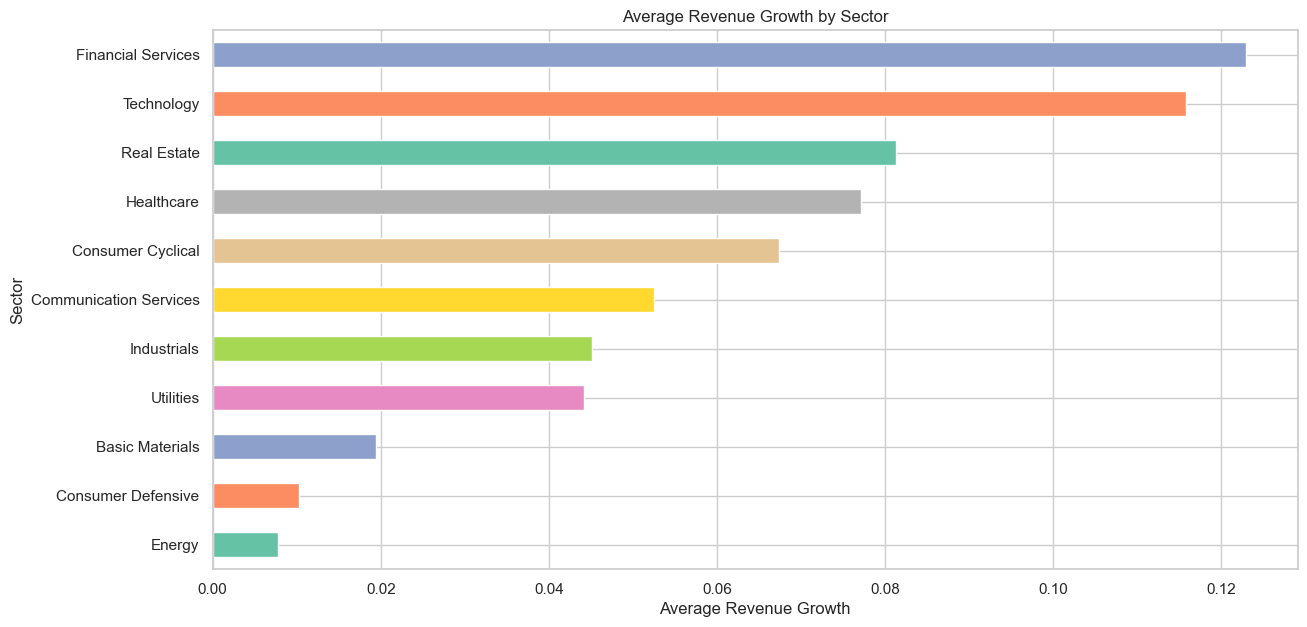

In [136]:
# Plotting the average revenue growth by sector
plt.figure(figsize=(14, 7))
# Calculate average revenue growth by sector
sector_revenuegrowth = df.groupby('Sector')['Revenuegrowth'].mean().sort_values()

# Choose a color palette
colors = sns.color_palette("Set2", len(sector_revenuegrowth))

# Plotting
plt.figure(figsize=(14, 7))
sector_revenuegrowth.plot(kind='barh', color=colors)
plt.title('Average Revenue Growth by Sector')
plt.xlabel('Average Revenue Growth')
plt.ylabel('Sector')
plt.show()

Interpretation:
The chart shows the average revenue growth of different sectors, with the sectors ordered from lowest to highest average revenue growth.
Financial Services has the highest average revenue growth, at approximately 12%.
Technology is second, with approximately 11% growth.
Real Estate has an average growth of around 8%.
Healthcare has an average revenue growth of approximately 7%.
Consumer Cyclicals, Communication Services, and Industrials have average growth rates of between 5% and 6%.
Utilities has an average revenue growth rate of about 4.5%.
Basic Materials has an average growth rate of about 2%.
Consumer Defensive and Energy have the lowest average revenue growth rates, below 2%.

## 6.6. Revenue Growth vs Market Capitalization

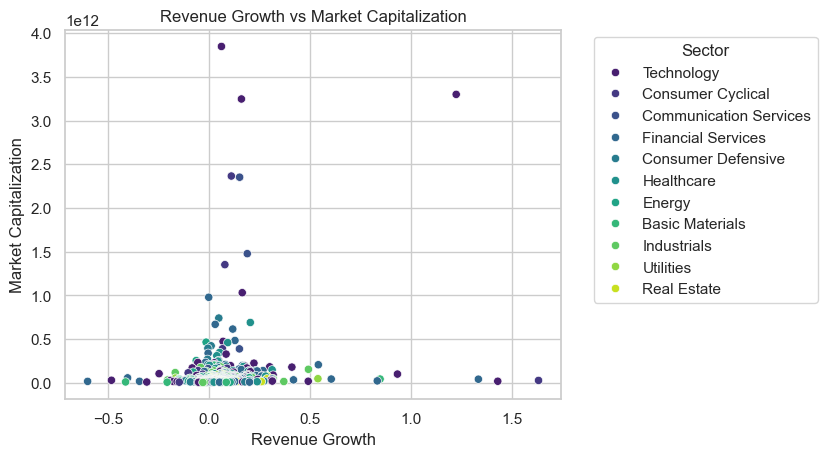

In [137]:
# scatter plot
sns.scatterplot(x='Revenuegrowth', y='Marketcap', data=df, hue='Sector', palette='viridis')
plt.title('Revenue Growth vs Market Capitalization')
plt.xlabel('Revenue Growth')
plt.ylabel('Market Capitalization')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Interpretation:
This scatter plot shows the relationship between revenue growth and market capitalization for the S&P 500 companies. Each point represents a company, and the color indicates the sector. This plot helps to identify if there's any correlation between revenue growth and market capitalization.

## 6.7. Box Plot of Market Capitalization by Sector

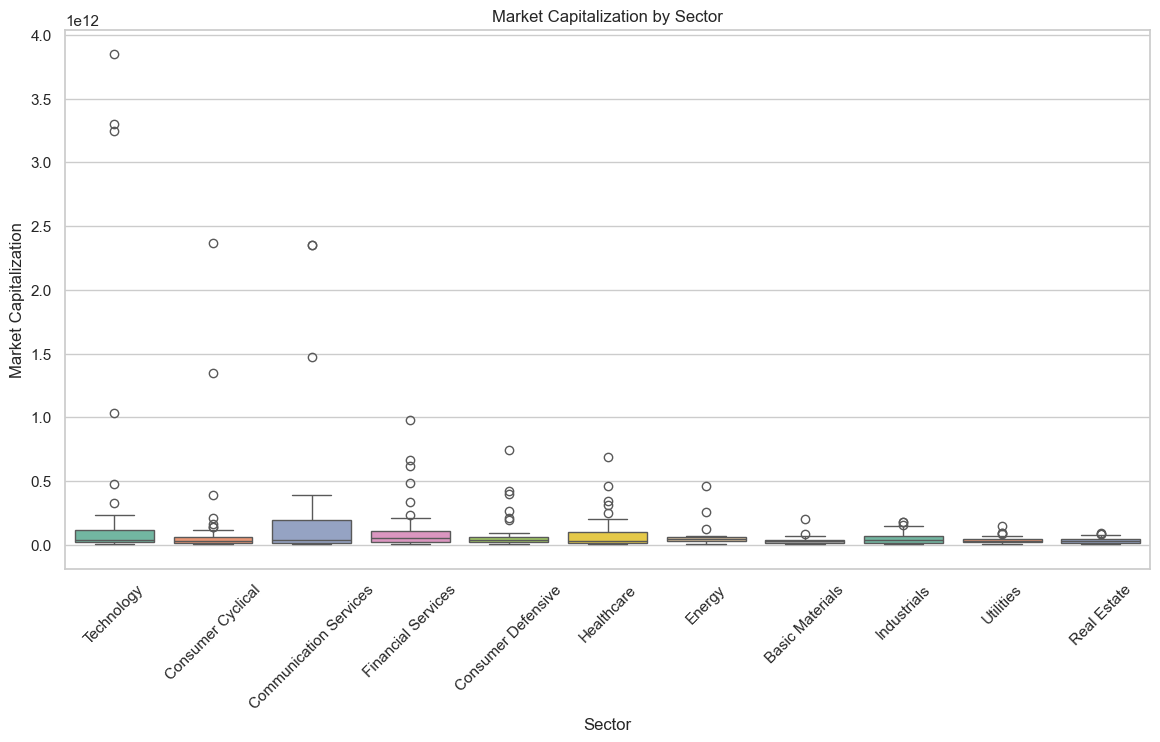

In [138]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Sector', y='Marketcap', data=df, hue='Sector', palette='Set2', legend=False)  # Set hue to 'Sector' and legend to False
plt.title('Market Capitalization by Sector')
plt.xlabel('Sector')
plt.ylabel('Market Capitalization')
plt.xticks(rotation=45)
plt.show()

Interpretation:
This box plot shows the distribution of market capitalization within each sector. The box represents the interquartile range (IQR), the line inside the box is the median, and the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Outliers are shown as individual points.

## 6.8. Correlation Heatmap

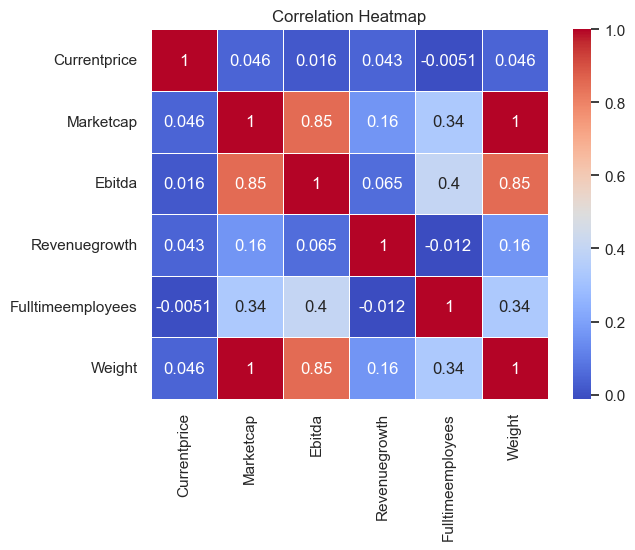

In [139]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Interpretation:
This heatmap shows the correlation between different numeric columns in the dataframe. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. This plot helps to identify which variables are strongly correlated with each other.

# 7. Conclution
This notebook presents an exploratory data analysis (EDA) of S&P 500 companies, revealing key insights into their financial and operational performance:

- Most companies show moderate revenue growth, with a few outliers at extreme ends.
- The technology sector has the highest average market capitalization, highlighting its dominance.
- A positive correlation exists between revenue growth and market capitalization, suggesting that higher growth often leads to larger market caps.
- Market capitalization varies significantly across sectors, as shown in the box plot.
- The correlation heatmap indicates strong relationships among various financial metrics, aiding further analysis.

Overall, this analysis provides a comprehensive overview of S&P 500 companies, offering valuable insights for investors, analysts, and researchers interested in U.S. stock market performance.